# Funzioni

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

def fit_predict_print(train, test, target_columns, estimator):
  X_tr = train.drop(columns=target_columns)
  y_tr = train[target_columns]
  X_ts = test.drop(columns=target_columns)
  y_ts = test[target_columns]

  return fit_predict_print_1(X_tr, X_ts, y_tr, y_ts, estimator)


def fit_predict_print_1(X_train, X_test, y_train, y_test, estimator):
  y_pred = estimator.fit(X_train, y_train).predict(X_test)

  print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
  cm = metrics.confusion_matrix(y_test, y_pred)
  print('Confusion matrix:\n', cm)
  cmn = metrics.confusion_matrix(y_test, y_pred, normalize='true')
  ConfusionMatrixDisplay(cmn, display_labels=estimator.classes_).plot()
  return y_pred

In [ ]:
def xtab(rows_data, cols_data, normalize_rows=False):
  xtab = pd.crosstab(rows_data, cols_data)
  if normalize_rows:
    for i in xtab.index:
      xtab.loc[i] = xtab.loc[i] / (rows_data == i).sum()
    _ = sns.heatmap(xtab, vmin=0, vmax=1)
  else:
    _ = sns.heatmap(xtab)
  print(xtab)
  return xtab

# Parte 1: Analisi

1

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BDA/data/bike.csv',
                      sep=';')

In [ ]:
dataset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


2

In [ ]:
dataset.season.value_counts().rename({
    1: 'spring' ,
    2: 'summer' ,
    3: 'fall'   ,
    4: 'winter' ,
})

fall      188
summer    184
spring    181
winter    178
Name: season, dtype: int64

3

yr     0   1
mnth        
1     31  31
2     28  29
3     31  31
4     30  30
5     31  31
6     30  30
7     31  31
8     31  31
9     30  30
10    31  31
11    30  30
12    31  31


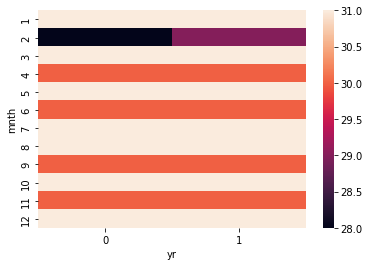

In [ ]:
xtab = xtab(dataset.mnth, dataset.yr)

In [ ]:
# Il numero di biciclette noleggiate per ogni mese risulta pari al numero dei
# giorni di ogni mese

4

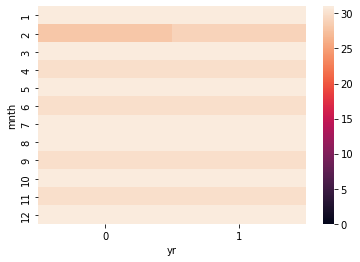

In [ ]:
_ = sns.heatmap(xtab, vmin=0)
# Fisso il valore minimo a zero, per evidenziare come non ci siano scostamenti
# significativi al di là della coincidenza con i giorni nei singoli mesi

# Parte 2: Trasformazione e Predizione

1

In [ ]:
train, test = train_test_split(dataset, train_size=2/3, random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression

Accuracy: 0.6311475409836066
Confusion matrix:
 [[138   7   2]
 [ 75  13   2]
 [  2   2   3]]


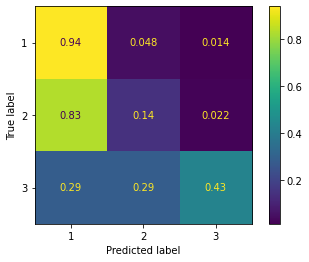

In [ ]:
_ = fit_predict_print(train, test, 'weathersit', LogisticRegression(n_jobs=-1))

In [ ]:
# L'accuratezza risulta abbastanza elevata perchè le predizioni sulla classe 1,
# prevalente tra le istanze, sono quasi interamente accurate. L'accuratezza
# sulle altre due classi risulta invece scadente

3

In [ ]:
X = dataset.drop(columns='weathersit')
y = dataset.weathersit

In [ ]:
cross_val_score(LogisticRegression(), X, y, cv=5, scoring='accuracy',
                n_jobs=-1).mean()

0.6401174168297455

In [ ]:
# Il metodo Cross Validation è ritenuto il migliore per allenare un algoritmo
# perchè, all'interno di un ciclo, utilizza tutto il dataset sia per il training
# che per il testing. Questo permette di ridurre l'overfitting.
# Di conseguenza, anche senza la confusion matrix, si può ritenere questo valore
# di accuratezza più attendibile del precedente.

5

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Accuracy: 0.6598360655737705
Confusion matrix:
 [[111  36   0]
 [ 40  47   3]
 [  1   3   3]]


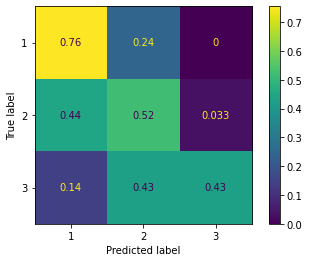

In [ ]:
_ = fit_predict_print(train, test, 'weathersit', DecisionTreeClassifier())

In [ ]:
cross_val_score(DecisionTreeClassifier(), X, y, cv=5, scoring='accuracy',
                n_jobs=-1).mean()

0.6922374429223744

In [ ]:
# L'accuratezza migliora leggermente.
# Analizzando la confusion matrix, si nota come l'accuratezza sulla classe 1 sia
# ancora elevata, ma meno che in precedenza, mentre migliora sensibilmente per
# le altre due classi.

6

In [ ]:
dataset['tempSimpl'] = np.where(dataset.atemp >= dataset.atemp.mean(), 2, 1)
dataset.drop(columns='atemp', inplace=True)

In [ ]:
X = dataset.drop(columns='weathersit')
y = dataset.weathersit

In [ ]:
cross_val_score(DecisionTreeClassifier(), X, y, cv=5, scoring='accuracy',
                n_jobs=-1).mean()

0.6950424005218526

7

In [ ]:
dataset.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'tempSimpl'],
      dtype='object')

In [ ]:
simplified = dataset.copy()
simplified['dayVsNight'] = np.where((simplified.hr >= 8) & (simplified.hr <= 20),
                                    1, 2)

AttributeError: ignored